# House Price Calculation

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [2]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

## Exploratory Data Analysis

In [3]:
len(set(train.Id))

1460

In [4]:
train.Id.shape[0]

1460

In [5]:
corrmat = train.corr()
top_corr_features = corrmat.columns[abs(corrmat['SalePrice']) > 0.5]
top_corrmat = train[top_corr_features].corr()

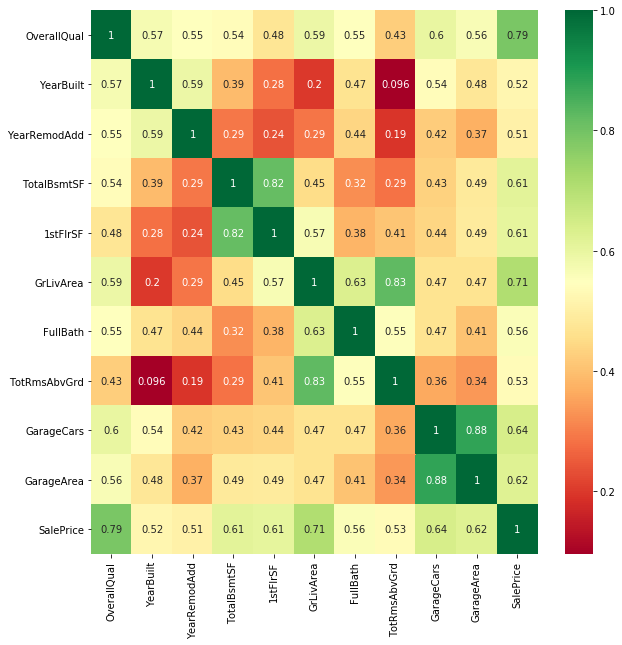

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(top_corrmat, annot=True, cmap='RdYlGn')

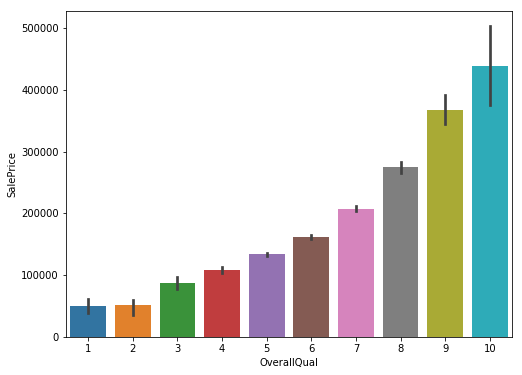

In [7]:
plt.figure(figsize=(8,6))
sns.barplot(train['OverallQual'], train['SalePrice'])

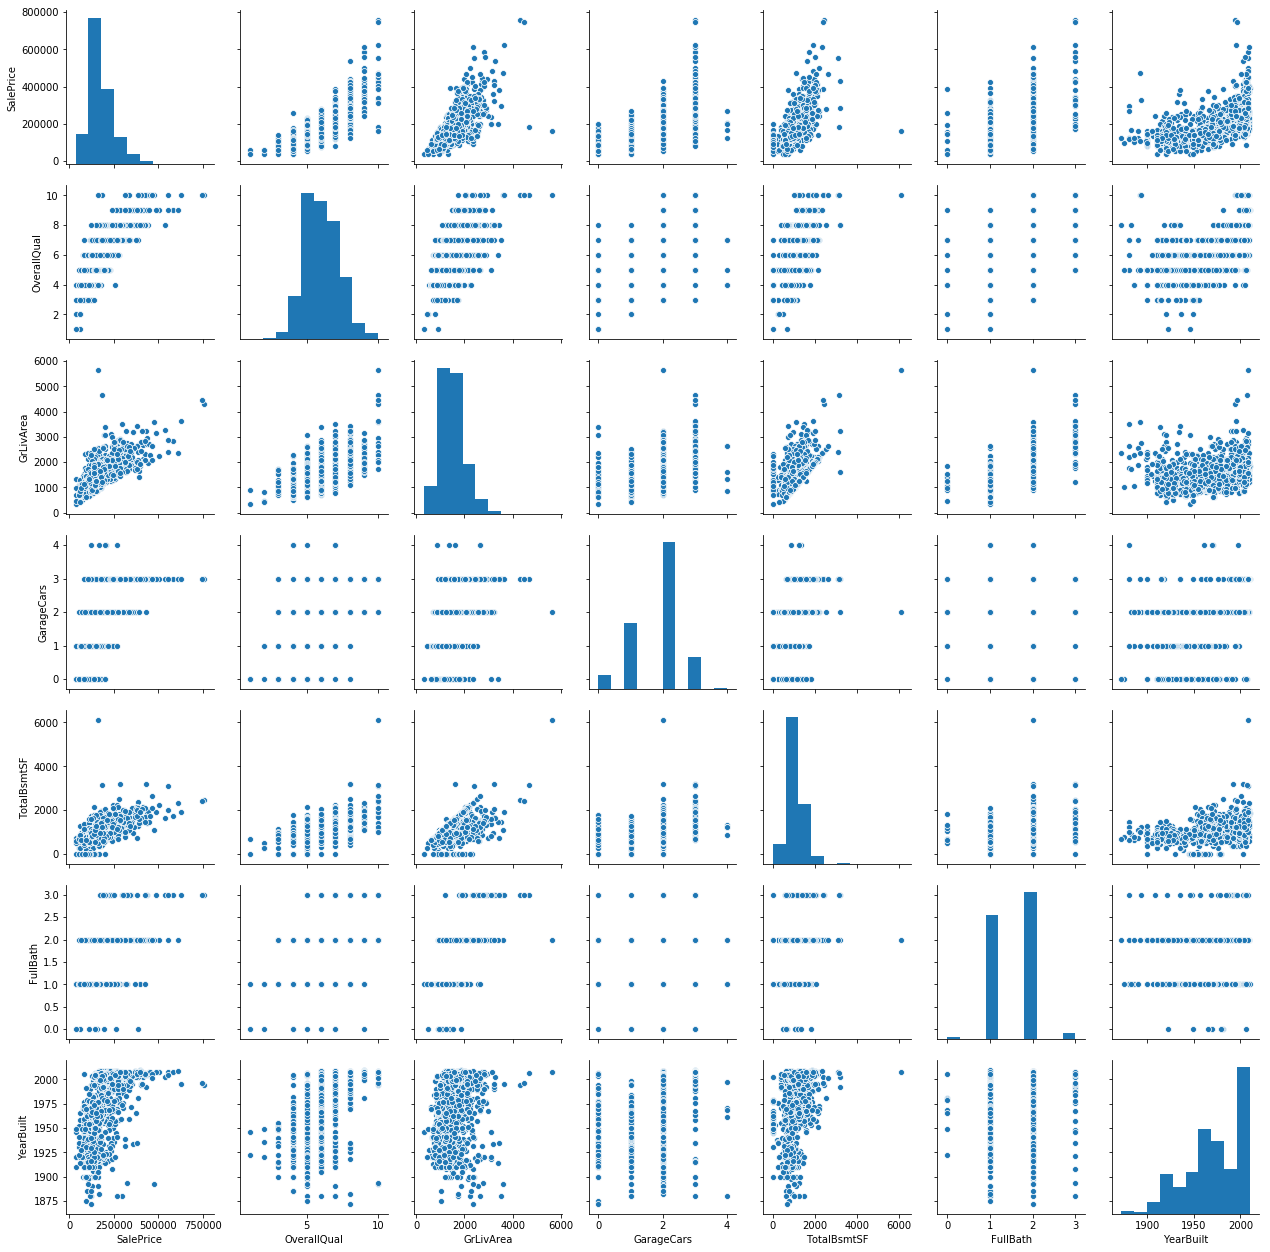

In [8]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height=2.5)
plt.show()

In [9]:
from scipy import stats
from scipy.stats import norm, skew

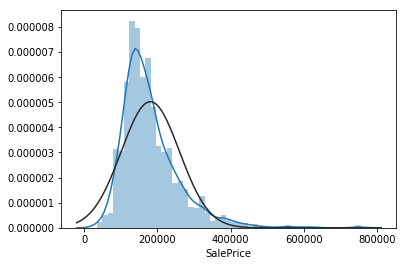

In [10]:
sns.distplot(train['SalePrice'], fit=norm)

In [11]:
mu = train['SalePrice'].mean()
sigma = train['SalePrice'].std()

In [12]:
important_features = ['Id', 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

In [13]:
train = train[important_features]

In [14]:
train.head()

,Id,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,1,208500,7,1710,2,856,2,2003
1,2,181500,6,1262,2,1262,2,1976
2,3,223500,7,1786,2,920,2,2001
3,4,140000,7,1717,3,756,1,1915
4,5,250000,8,2198,3,1145,2,2000


In [15]:
p = pd.qcut(train['YearBuilt'], [0, .25, .5, .75, 1.])

In [16]:
def year(y):
    if (y >= 1871) and (y < 1954): 
        return 'old' 
    elif (y >= 1954) and (y < 1973): 
        return 'moderate' 
    elif (y >= 1973) and (y < 2000): 
        return 'new'
    else:
        return 'very new'

In [17]:
train['YearBuilt'] = train['YearBuilt'].apply(year)

In [18]:
dummy_cols = pd.get_dummies(train['YearBuilt'])

In [19]:
train = pd.concat([train, dummy_cols], axis=1)

In [20]:
train.drop(['YearBuilt'], axis=1, inplace=True)

In [21]:
train.head()

,Id,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,moderate,new,old,very new
0,1,208500,7,1710,2,856,2,0,0,0,1
1,2,181500,6,1262,2,1262,2,0,1,0,0
2,3,223500,7,1786,2,920,2,0,0,0,1
3,4,140000,7,1717,3,756,1,0,0,1,0
4,5,250000,8,2198,3,1145,2,0,0,0,1


In [22]:
X = train.drop(['SalePrice', 'Id'], axis=1)
y = train['SalePrice']

## Predictions

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
from sklearn import linear_model

model = linear_model.LinearRegression()

model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [29]:
mean_squared_error(y_test, predictions)

1769657268.4694474